In [1]:
# Load the usual suspects:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import pandas as pd

# Fiddle with figure settings here:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 14
plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams['axes.linewidth'] = 2
# Set the default colour cycle (in case someone changes it...)
from cycler import cycler
cols = plt.get_cmap('tab10').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=cols)

**Формирование 1 варианта**

$$f_1 = 0.1 \times (t-100)^2 + 51sin(\frac{2\pi t}{20}) + Rand\{-100,100\}$$
$$f_2 = 0.0005 \times (t-120)^3 + 70cos(\frac{2\pi t}{30}) + 25sin(\frac{2\pi t}{20}) + Rand\{-200, 200\}$$

In [2]:
N = [200, 170]
t = [np.arange(0, N[0]), np.arange(0,N[1])+20] 
p = [20, 30, 20]
trend = [lambda t: 0.1*(t-100)**2, lambda t: 0.0005*(t-120)**3]
periodic = [lambda t: 51*np.sin((2*np.pi*t)/20),\
           lambda t: 70*np.cos((2*np.pi*t)/30),\
           lambda t: 25*np.sin((2*np.pi*t)/20)]
f = [lambda t: trend[0](t) + periodic[0](t),\
     lambda t: trend[1](t) + periodic[1](t) + periodic[2](t)]
F = [f[0](t[0]) + 100*np.random.rand(N[0]),\
    f[1](t[1]) + 200*np.random.rand(N[1])]

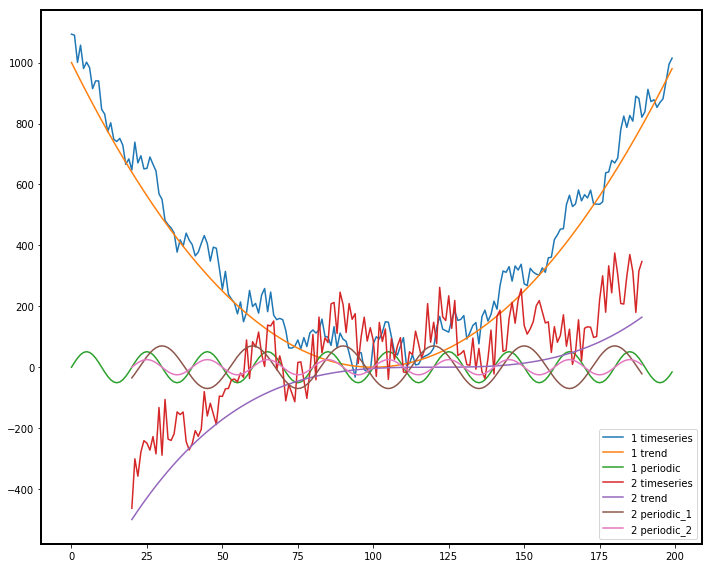

In [3]:
plt.figure(figsize=(10,8))
plt.plot(t[0], F[0])
plt.plot(t[0], trend[0](t[0]))
plt.plot(t[0], periodic[0](t[0]))
plt.plot(t[1], F[1])
plt.plot(t[1], trend[1](t[1]))
plt.plot(t[1], periodic[1](t[1]))
plt.plot(t[1], periodic[2](t[1]))
plt.legend(['1 timeseries','1 trend', '1 periodic',\
            "2 timeseries", '2 trend', '2 periodic_1', '2 periodic_2'])
plt.tight_layout()

In [4]:
f1 = pd.DataFrame({'first': F[0]}, index=t[0])
f2 = pd.DataFrame({'second': F[1]}, index=t[1])
f1['second'] = f2
f1.to_csv('1_variante.csv')

**Формирование 2 варианта**

$$f_1 = 1.5 \times (t-40) + 51sin(\frac{2\pi t}{33}) + Rand\{-100,100\}$$
$$f_2 = 0.03 \times (t-110)^2 + 70sin(\frac{2\pi t}{43}) + 70sin(\frac{2\pi t}{34}) + 25sin(\frac{2\pi t}{23}) + Rand\{-200, 200\}$$

In [5]:
N = [150, 250]
t = [np.arange(0, N[0]), np.arange(0,N[1])+20] 
p = [20, 30, 20]
trend = [lambda t: 1.5*(t-40), lambda t: 0.03*(t-110)**2]
periodic = [lambda t: 51*np.sin((2*np.pi*t)/33),\
           lambda t: 70*np.sin((2*np.pi*t)/43),\
           lambda t: 70*np.sin((2*np.pi*t)/34),\
           lambda t: 25*np.sin((2*np.pi*t)/23)]
f = [lambda t: trend[0](t) + periodic[0](t),\
     lambda t: trend[1](t) + periodic[1](t) + periodic[2](t) + periodic[3](t)]
F = [f[0](t[0]) + 100*np.random.rand(N[0]),\
    f[1](t[1]) + 200*np.random.rand(N[1])]

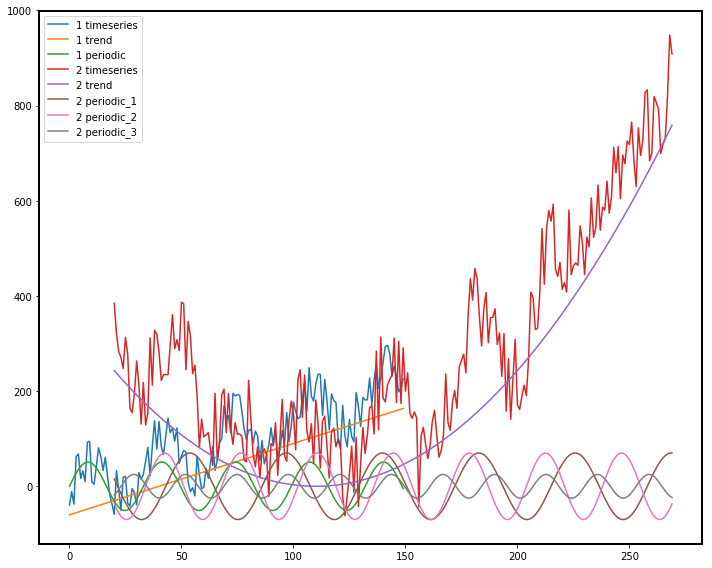

In [6]:
plt.figure(figsize=(10,8))
plt.plot(t[0], F[0])
plt.plot(t[0], trend[0](t[0]))
plt.plot(t[0], periodic[0](t[0]))
plt.plot(t[1], F[1])
plt.plot(t[1], trend[1](t[1]))
plt.plot(t[1], periodic[1](t[1]))
plt.plot(t[1], periodic[2](t[1]))
plt.plot(t[1], periodic[3](t[1]))
plt.legend(['1 timeseries','1 trend', '1 periodic',\
            "2 timeseries", '2 trend', '2 periodic_1', '2 periodic_2', '2 periodic_3'])
plt.tight_layout()

In [7]:
f1 = pd.DataFrame({'first': F[0]}, index=t[0])
f2 = pd.DataFrame({'second': F[1]}, index=t[1])


In [10]:
pd.concat([f1,f2], axis=1).to_csv('./2_variant.csv')